In [49]:
# pip install ultralytics
import numpy as np
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

In [3]:
# Predict with the model
results = model('pizza_with_spoon.jpg')  # predict on an image


image 1/1 /opt/fd/2019A7PS0010U/projects/segment-anything/pizza_with_spoon.jpg: 480x640 1 fork, 1 spoon, 1 pizza, 1 dining table, 104.0ms
Speed: 4.0ms preprocess, 104.0ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)


In [4]:
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [9]:

for result in results:
    boxes = result.boxes.data  # Boxes object for bbox outputs
    masks = result.masks.data  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs


In [32]:
print(results[0].masks.data.shape)

torch.Size([4, 480, 640])


In [43]:
total = 0
count = 100
for i in range(4):
    for j in range(480):
        for k in range(640):
            if(masks[i][j][k]!=0 and count >0):
#                 print(masks[i][j][k])
                count-=1

# print(total)

In [37]:
print(masks[1])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [55]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

AttributeError: 'tuple' object has no attribute 'shape'

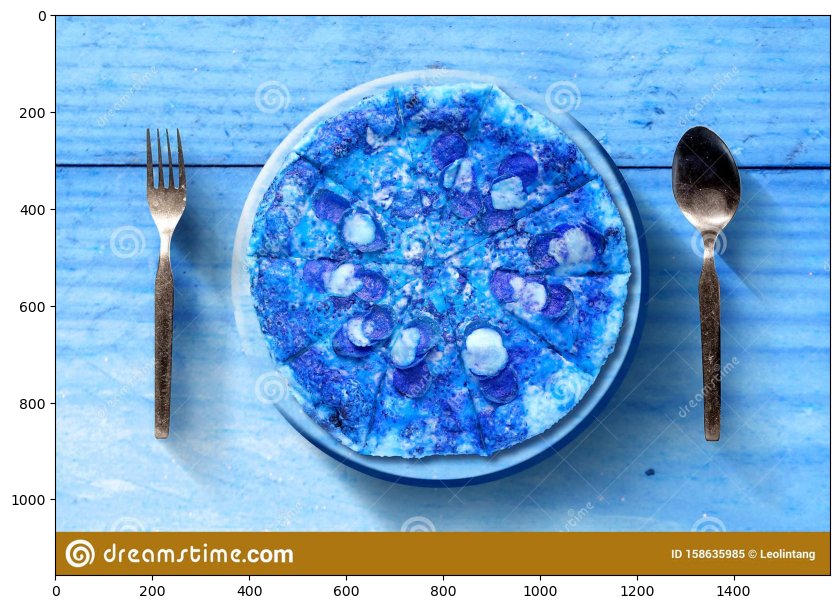

In [57]:
new_masks = np.array(results[0].masks.data)
img = cv2.imread("pizza_with_spoon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_label = np.array([1])
for i, (mask) in enumerate(zip(new_masks)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    plt.title(f"Mask {i+1}, Score: ", fontsize=18)
    plt.show()

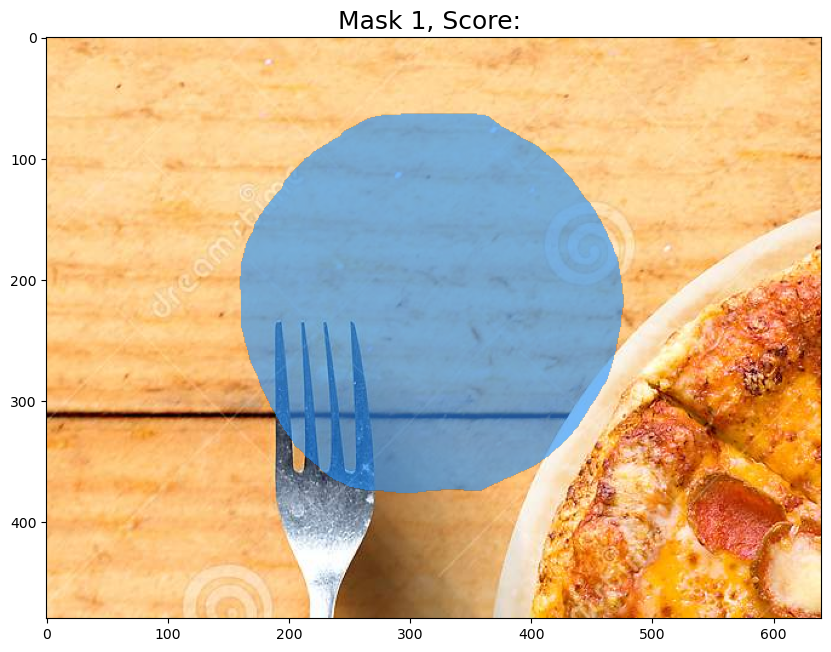

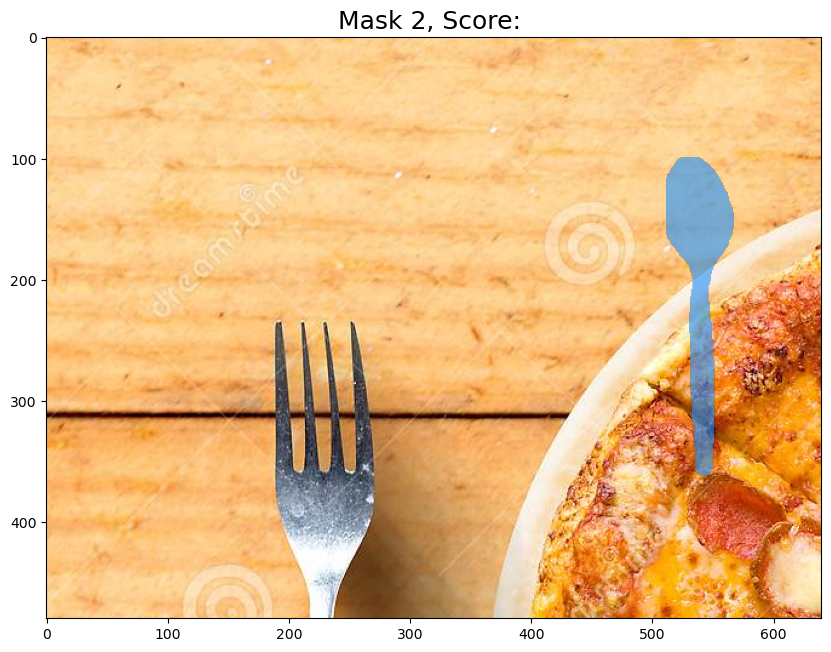

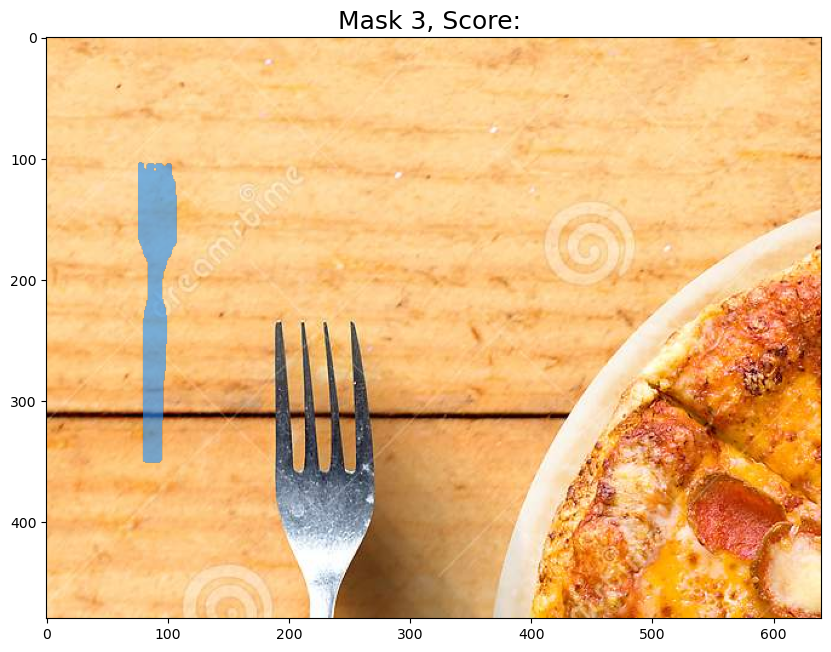

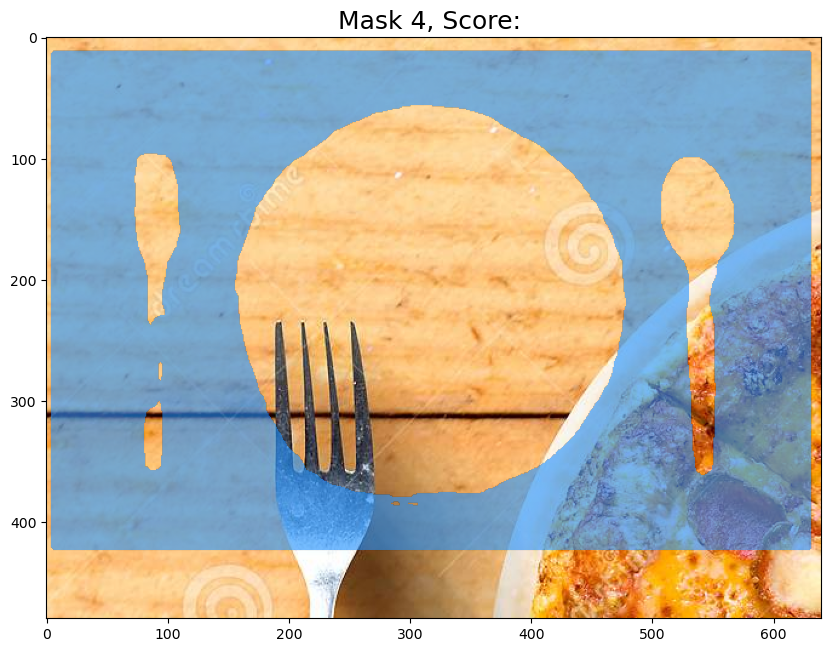

In [66]:
def show_mask(mask, ax, random_color=False):
    mask = np.array(mask)  # convert mask to a NumPy array
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

new_masks = np.array(results[0].masks.data)
img = cv2.imread("pizza_with_spoon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_label = np.array([1])
for i, (mask) in enumerate(zip(new_masks)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    plt.title(f"Mask {i+1}, Score: ", fontsize=18)
    plt.show()


In [64]:
print(results[0].masks.data.shape)
print(img.shape)

torch.Size([4, 480, 640])
(1157, 1600, 3)


In [67]:
!yolo predict model=yolov8n.pt source='pizza_with_spoon.jpg'

100%|██████████████████████████████████████| 6.23M/6.23M [00:02<00:00, 2.37MB/s]
Ultralytics YOLOv8.0.89 🚀 Python-3.9.13 torch-2.0.0+cu117 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /opt/fd/2019A7PS0010U/projects/segment-anything/pizza_with_spoon.jpg: 480x640 2 forks, 1 spoon, 1 pizza, 1 dining table, 77.7ms
Speed: 2.8ms preprocess, 77.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
